In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


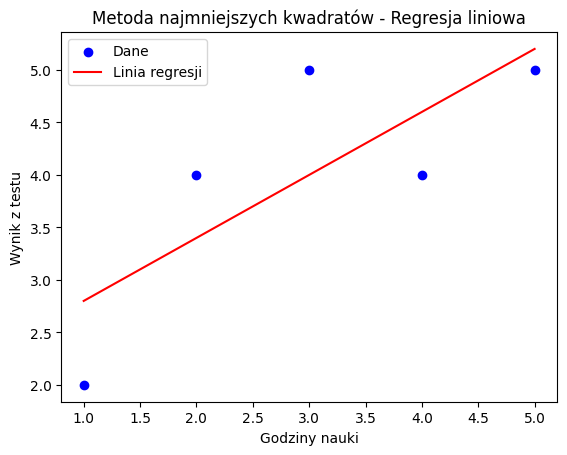

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Estymowane parametry: a = 2.4845, b = -0.8052
Prawdziwe parametry:  a = 2.5, b = -1.0


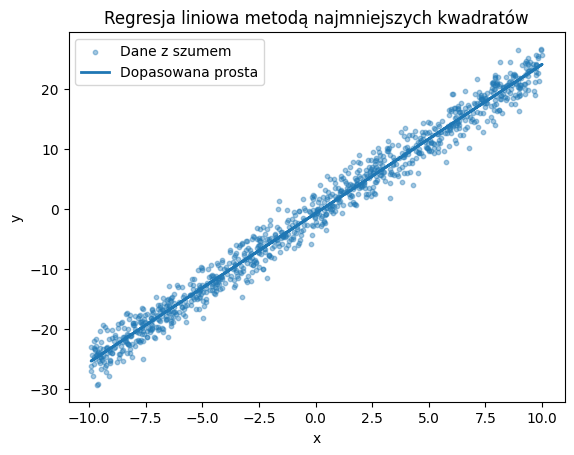

In [ ]:
a = 2.5
b = -1.0

np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
szum = np.random.normal(0, 2, 1000)
y = a * x + b + szum

a2, b2 = np.polyfit(x, y, 1)

print(f"Estymowane parametry: a = {a2:.4f}, b = {b2:.4f}")
print(f"Prawdziwe parametry:  a = {a}, b = {b}")

plt.scatter(x, y, s=10, alpha=0.4, label="Dane z szumem")
plt.plot(x, a2 * x + b2, label="Dopasowana prosta", linewidth=2)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa metodą najmniejszych kwadratów")
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Kowariancja: -202.699
Odchylenie standardowe Exposure: 6.931
Odchylenie standardowe PEFR: 104.701
Współczynnik korelacji Pearsona: -0.279


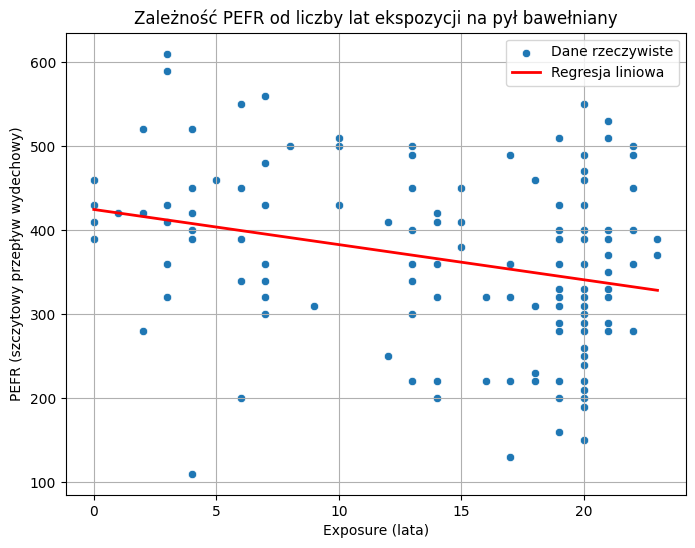

Można zaobserwować trend polegający na tym, że PERF nieznacznie maleje wraz z liczbą lat ekspozycji. 
Jest jednak wiele wartości odstających, dla których mawet przy relatywnie krótkim czasie ekspozycji PEFR jest niskie oraz dla których przy wysokim czasie ekspozycji PEFR również jest wysokie.


In [ ]:
df = pd.read_csv('LungDisease.csv')

x = df['Exposure']
y = df['PEFR']

mean_x = np.mean(x)
mean_y = np.mean(y)
std_x = np.std(x, ddof=0)
std_y = np.std(y, ddof=0)
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
pearson_coefficient = cov_xy / (std_x * std_y)

print(f"Kowariancja: {cov_xy:.3f}")
print(f"Odchylenie standardowe Exposure: {std_x:.3f}")
print(f"Odchylenie standardowe PEFR: {std_y:.3f}")
print(f"Współczynnik korelacji Pearsona: {pearson_coefficient:.3f}")

from sklearn.linear_model import LinearRegression

X = df[['Exposure']]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Exposure', y='PEFR', label='Dane rzeczywiste')
plt.plot(df['Exposure'], y_pred, color='red', linewidth=2, label='Regresja liniowa')
plt.title('Zależność PEFR od liczby lat ekspozycji na pył bawełniany')
plt.xlabel('Exposure (lata)')
plt.ylabel('PEFR (szczytowy przepływ wydechowy)')
plt.legend()
plt.grid(True)
plt.show()

print("Można zaobserwować trend polegający na tym, że PERF nieznacznie maleje wraz z liczbą lat ekspozycji. \nJest jednak wiele wartości odstających, dla których mawet przy relatywnie krótkim czasie ekspozycji PEFR jest niskie oraz dla których przy wysokim czasie ekspozycji PEFR również jest wysokie.")

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



      x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89


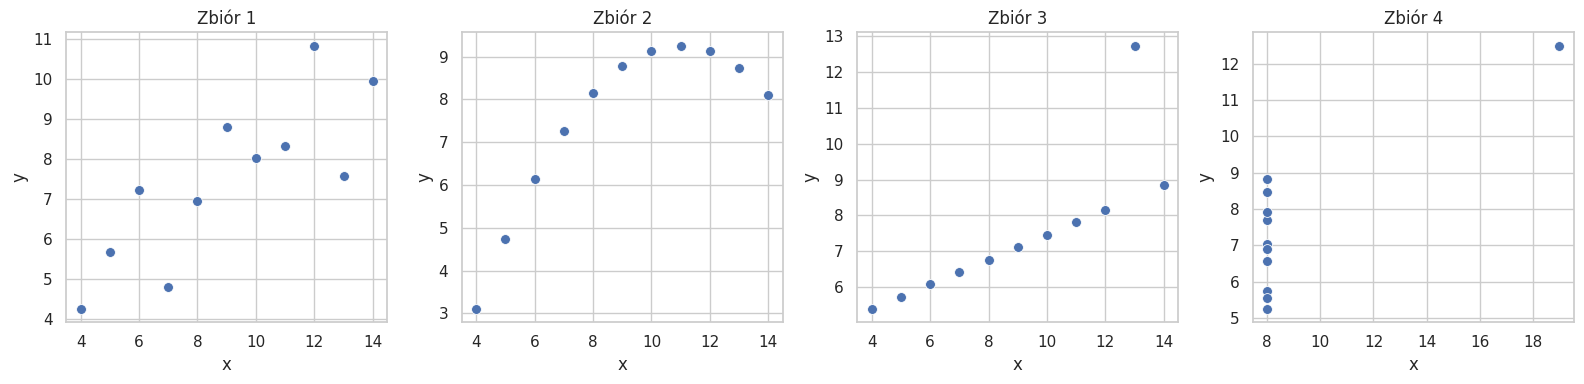

Zbiór 1: (x1, y1)
  a = 0.5001 ± 0.1179
  b = 3.0001 ± 1.1247
  R^2 = 0.6665
--------------------------------------------------
Zbiór 2: (x2, y2)
  a = 0.5000 ± 0.1180
  b = 3.0009 ± 1.1253
  R^2 = 0.6662
--------------------------------------------------
Zbiór 3: (x3, y3)
  a = 0.4997 ± 0.1179
  b = 3.0025 ± 1.1245
  R^2 = 0.6663
--------------------------------------------------
Zbiór 4: (x4, y4)
  a = 0.4999 ± 0.1178
  b = 3.0017 ± 1.1239
  R^2 = 0.6667
--------------------------------------------------
Współczynnik korelacji Pearsona dla każdej pary:

Zbiór 1: (x1, y1)
  r = 0.8164
  p-value = 2.1696e-03
----------------------------------------
Zbiór 2: (x2, y2)
  r = 0.8162
  p-value = 2.1788e-03
----------------------------------------
Zbiór 3: (x3, y3)
  r = 0.8163
  p-value = 2.1763e-03
----------------------------------------
Zbiór 4: (x4, y4)
  r = 0.8165
  p-value = 2.1646e-03
----------------------------------------


In [ ]:
df = pd.read_csv('anscombe.csv', skiprows=2, header=None)

df.columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
print(df)

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

pairs = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4")]

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(x=df[x], y=df[y], ax=axes[i], s=50)
    axes[i].set_title(f'Zbiór {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.tight_layout()
plt.show()


results = {}

for x_col, y_col in pairs:
    x = df[x_col]
    y = df[y_col]
    res = stats.linregress(x, y)
    results[f"{x_col},{y_col}"] = res

for i, ((x_col, y_col), res) in enumerate(zip(pairs, results.values()), start=1):
    print(f"Zbiór {i}: ({x_col}, {y_col})")
    print(f"  a = {res.slope:.4f} ± {res.stderr:.4f}")
    print(f"  b = {res.intercept:.4f} ± {res.intercept_stderr:.4f}")
    print(f"  R^2 = {res.rvalue**2:.4f}")
    print("-" * 50)

print("Współczynnik korelacji Pearsona dla każdej pary:\n")

for i, (x_col, y_col) in enumerate(pairs, start=1):
    r, p = stats.pearsonr(df[x_col], df[y_col])
    print(f"Zbiór {i}: ({x_col}, {y_col})")
    print(f"  r = {r:.4f}")
    print(f"  p-value = {p:.4e}")
    print("-" * 40)